I will be using a Naive Bayes prediction algorithm for this project report.

a. Naive Bayes is based on Bayes' Thereom. This is a probability theory that describes the probability of an event based on prior knowledge and conditions. 
Naive Bayes is expressed by: P(A∣B)= 
P(B∣A)×P( / P(B)A)P(A∣B) is the probability of class A given the features B
�
)
P(B∣A) is the probability of observing the features B given clP(A) is the prior probability of class A
P(B) is the probability of observing the features B

b. Naive Bayes is most commonly used for classifying inputs into predefined classes and labels. 
For example: Spam vs Non Spam Emails, Sentiment Analysis, Topic Categorization, Weather Prediction, and even Medical Diagnosis

c. Advantages of Naive Bayes: Easy to use and easy to understand, Handles numerical and categorical data, and is Well suited for text specifications when feature space may be large.
Disadvantages of Naive Bayes: Sensitive to outliers, May not capture complex relationships, Most effective with text classificationass A
​


In [2]:
import pandas as pd
file_path = r'C:\Users\kevin\Downloads\archive (3)\Emotion_classify_Data.csv'
df = pd.read_csv(file_path)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = r'C:\Users\kevin\Downloads\archive (3)\Emotion_classify_Data.csv'
df = pd.read_csv(file_path)
print("Column Names:", df.columns)

X = df['Comment']
y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

y_pred = nb_classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Column Names: Index(['Comment', 'Emotion'], dtype='object')
Accuracy: 0.89

Confusion Matrix:
[[360  20  12]
 [ 19 381  16]
 [ 29  29 322]]

Classification Report:
              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       392
        fear       0.89      0.92      0.90       416
         joy       0.92      0.85      0.88       380

    accuracy                           0.89      1188
   macro avg       0.90      0.89      0.89      1188
weighted avg       0.90      0.89      0.89      1188



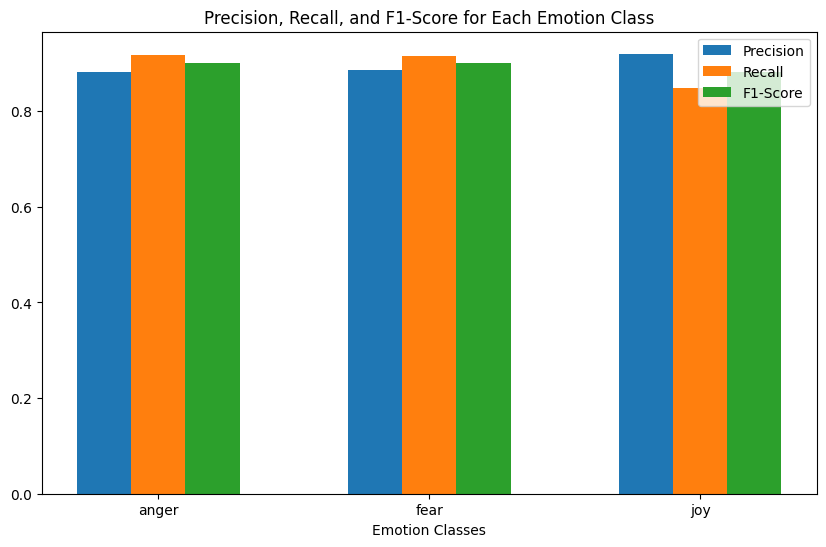

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

emotions = list(report.keys())[:-3]
precision = [report[emotion]['precision'] for emotion in emotions]
recall = [report[emotion]['recall'] for emotion in emotions]
f1_score = [report[emotion]['f1-score'] for emotion in emotions]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = range(len(emotions))

bar1 = ax.bar(index, precision, width=bar_width, label='Precision', align='center')
bar2 = ax.bar([i + bar_width for i in index], recall, width=bar_width, label='Recall', align='center')
bar3 = ax.bar([i + 2 * bar_width for i in index], f1_score, width=bar_width, label='F1-Score', align='center')

ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(emotions)
ax.set_xlabel('Emotion Classes')
ax.set_title('Precision, Recall, and F1-Score for Each Emotion Class')
ax.legend()

plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = r'C:\Users\kevin\Downloads\archive (3)\Emotion_classify_Data.csv'
df = pd.read_csv(file_path)

X = df['Comment']
y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_vectorized, y_train)

y_pred_knn = knn_classifier.predict(X_test_vectorized)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("Results for K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(classification_rep_knn)

Results for K-Nearest Neighbors:
Accuracy: 0.46

Confusion Matrix:
[[248  83  61]
 [180 174  62]
 [164  89 127]]

Classification Report:
              precision    recall  f1-score   support

       anger       0.42      0.63      0.50       392
        fear       0.50      0.42      0.46       416
         joy       0.51      0.33      0.40       380

    accuracy                           0.46      1188
   macro avg       0.48      0.46      0.45      1188
weighted avg       0.48      0.46      0.46      1188



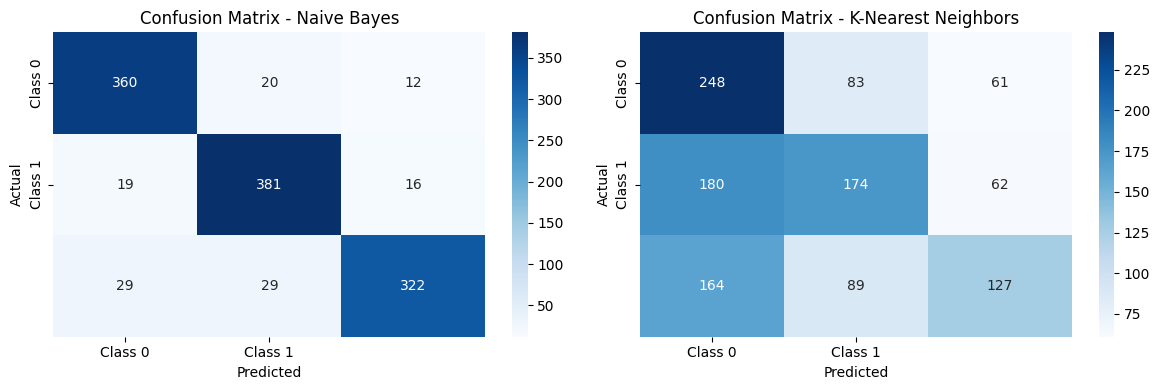


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       392
        fear       0.89      0.92      0.90       416
         joy       0.92      0.85      0.88       380

    accuracy                           0.89      1188
   macro avg       0.90      0.89      0.89      1188
weighted avg       0.90      0.89      0.89      1188


Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

       anger       0.42      0.63      0.50       392
        fear       0.50      0.42      0.46       416
         joy       0.51      0.33      0.40       380

    accuracy                           0.46      1188
   macro avg       0.48      0.46      0.45      1188
weighted avg       0.48      0.46      0.46      1188



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')

plt.tight_layout()
plt.show()

print("\nClassification Report - Naive Bayes:")
print(classification_rep)

print("\nClassification Report - K-Nearest Neighbors:")
print(classification_rep_knn)